Práctica 3 - Análisis estadístico de señales - Grupo 7

Valentina Garcia Obando C.C.1000539432

Juan José Alzate Molina.  C.C. 1007232151

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor
RMS se define en forma discreta con N número de muestras, como:

𝑥𝑅𝑀𝑆 = [[1/N]*[∑𝑥(𝑖)^2]]^1/2


In [1]:
import numpy as np

def xRMS(x):
    # Asegúrate de que x es un array de NumPy
    x = np.asarray(x)

    # Calcula el valor RMS con N=len(x)
    xRMS = np.sqrt(np.sum(x**2) / len(x))

    return xRMS

#Análisis estadístico de ECG

In [2]:
from google.colab import files
from scipy.io import loadmat
uploaded = files.upload()

data = loadmat('signals.mat')

# Ver las variables disponibles en el archivo
data.keys()

Saving signals.mat to signals.mat


dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])

Analisis Estadistico de ECG

In [3]:
ECG=data['ECG_asRecording']
ECG_filtered=data['ECG_filtered']

In [4]:
ECG_filtered

array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
        -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]])

In [5]:
filas, columnas = ECG_filtered.shape
n_filas=filas
n_columnas=columnas
print(n_columnas)
print(n_filas)

30720
1


In [6]:
ECG

array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]])

• A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las
señales, cree un vector de tiempo.

• Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser
el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

In [7]:
import numpy as np
T=1/1024
np.arange(0,ECG_filtered.size*T,T)

array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       2.99970703e+01, 2.99980469e+01, 2.99990234e+01])

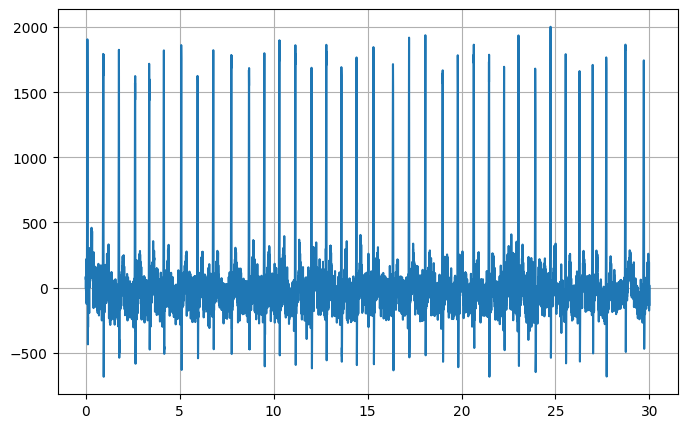

In [8]:
import matplotlib.pyplot as plt
T=1/1024
t=np.arange(0,ECG_filtered.size*T,T)
ECG_filtered = ECG_filtered.flatten()

plt.figure(figsize=(8, 5))
plt.plot(t,ECG_filtered)
plt.grid(True)
plt.show()

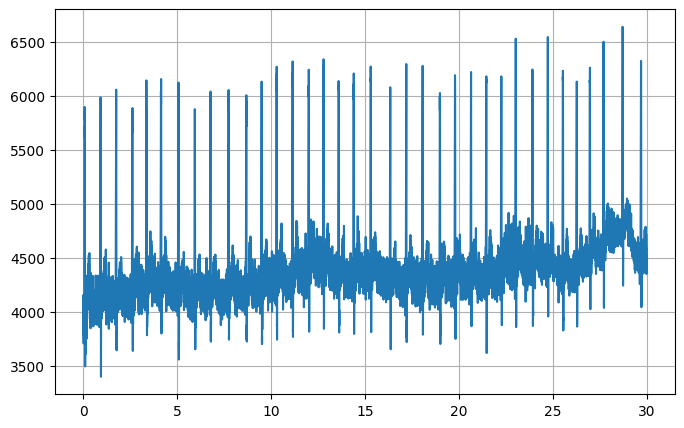

In [9]:
T=1/1024
t=np.arange(0,ECG.size*T,T)
ECG = ECG.flatten()

plt.figure(figsize=(8, 5))
plt.plot(t,ECG)
plt.grid(True)
plt.show()

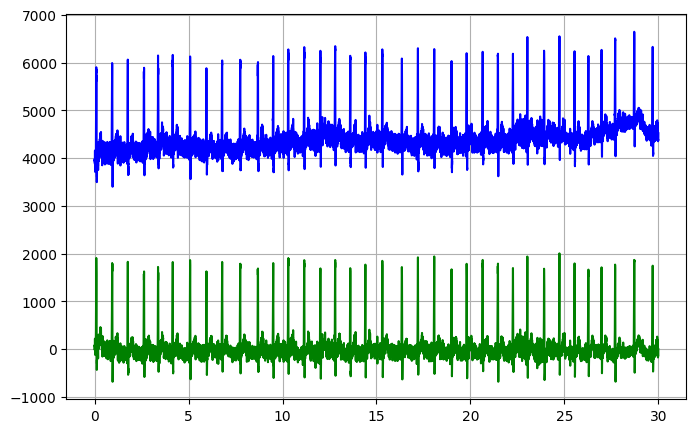

In [10]:
T=1/1024
t=np.arange(0,ECG.size*T,T)
ECG = ECG.flatten()

plt.figure(figsize=(8, 5))
plt.plot(t,ECG, 'b')
plt.plot(t,ECG_filtered,'g')
plt.grid(True)
plt.show()

Se puede apreciar una disminución en la amplitud de la señal filtrada, y se aprecia un poco mejor el complejo intermedio entre picos, tiene mayor definición, probablemente producto del filtrado de una frecuencia de ruido presente en la señal (se requiere análisis de frecuencia para concluir)

* Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo
cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

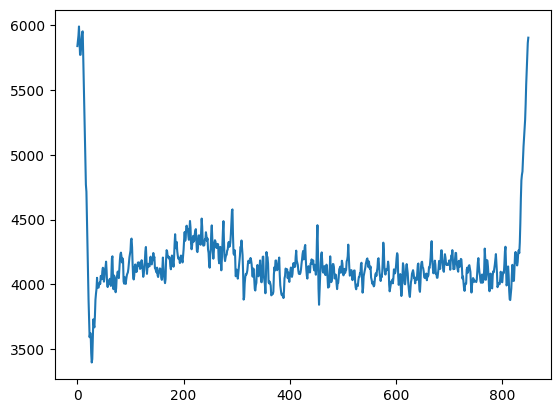

In [11]:
c_i = 950
c_f = 1800

ECG_ciclo = ECG[c_i:c_f]
plt.plot(ECG_ciclo)

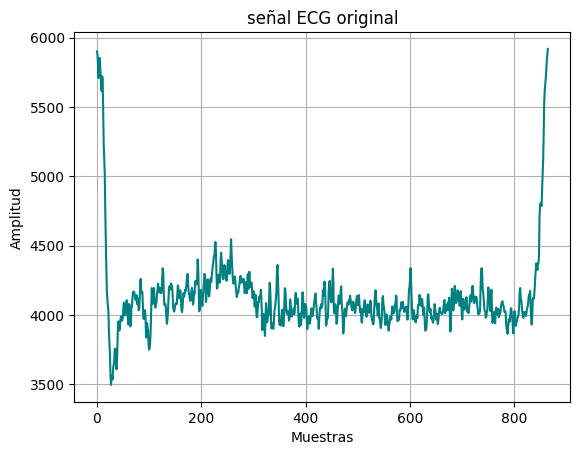

el promedio de la señal original es:  4131.136266878161
el RMS de la señal oroginal es: 4142.454957820607
la varianza de la señal original es: 93646.2220564969
la desviación estandar de la señal original es: 306.01670225086883


In [13]:
from scipy.signal import find_peaks
def picos(ECG):
    maximos, _ = find_peaks(ECG, distance=850)

    max1 = maximos[0]
    max2 = maximos[1]


    ciclo = ECG[max1:max2]

    return ciclo

ciclo_ECG = picos(ECG)
plt.plot(ciclo_ECG,'teal')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('señal ECG original')
plt.grid()
plt.show()
prom = np.mean(ciclo_ECG)
print('el promedio de la señal original es: ',prom)
rms = xRMS(ciclo_ECG)
print('el RMS de la señal oroginal es:', rms)
var = np.var(ciclo_ECG)
print('la varianza de la señal original es:', var )
des_estandar = np.std(ciclo_ECG)
print('la desviación estandar de la señal original es:', des_estandar )

El RMS es un valor que se toma efectivo de la señal, es comúm mente utilizado para expresar la amplitud de señales variables en el tiempo como en nuestro caso el ECG. Por ende tiene sentido que se vea relacionado con el valor promedio (ambos cerca de 4135).

La varianza es una medida de dispersión que indica cuánto varíana los valores de la señal al rededor de su media y la desviación estándar esta indica cuanto se alejan los valores individuales de la media. Podemos apreciar que ambas son altas, debido a los picos y la aleatoreidad natural de esta señal.

• Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.

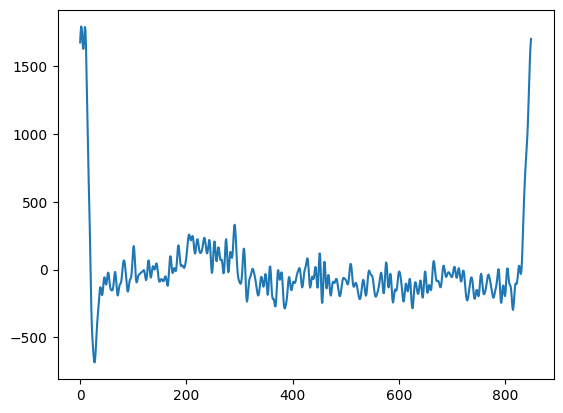

In [15]:
c_i = 950
c_f = 1800

ECG_ciclo = ECG_filtered[c_i:c_f]
plt.plot(ECG_ciclo)

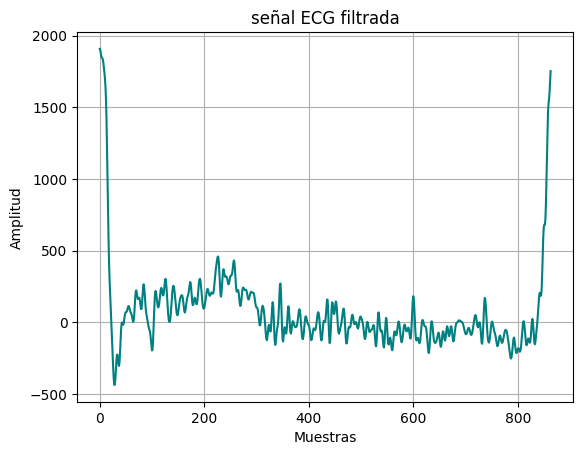

el promedio de la señal filtrada es:  74.00995782055861
el RMS de la señal filtrada es: 319.62757818893766
la varianza de la señal filtrada es: 96684.31488232457
la desviación estandar de la señal filtrada es: 310.94101511753735


In [17]:
ciclo_ECG = picos(ECG_filtered)
plt.plot(ciclo_ECG,'teal')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('señal ECG filtrada')
plt.grid()
plt.show()
prom = np.mean(ciclo_ECG)
print('el promedio de la señal filtrada es: ',prom)
rms = xRMS(ciclo_ECG)
print('el RMS de la señal filtrada es:', rms)
var = np.var(ciclo_ECG)
print('la varianza de la señal filtrada es:', var )
des_estandar = np.std(ciclo_ECG)
print('la desviación estandar de la señal filtrada es:', des_estandar )

•
Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?

Promedio ciclo 1: 98.76212104547919
Promedio ciclo 2: -13.5044187637702
Promedio ciclo 3: -4.937350266906564
Promedio ciclo 4: -2.1915198526014628
Promedio ciclo 5: -15.886084539947237
Promedio ciclo 6: -5.5217999300734375
Promedio ciclo 7: 28.790337295480967
Promedio ciclo 8: -9.166265452820877
Promedio ciclo 9: 3.3630744058432085
Promedio ciclo 10: 8.173305574324381
Promedio ciclo 11: 4.201570714904338
Promedio ciclo 12: -23.59663727580078
Promedio ciclo 13: -0.664681761384616
Promedio ciclo 14: 15.846440943661433
Promedio ciclo 15: -3.473655923133829
Promedio global: 5.3462957475502995
Varianza global: 83811.50817729275


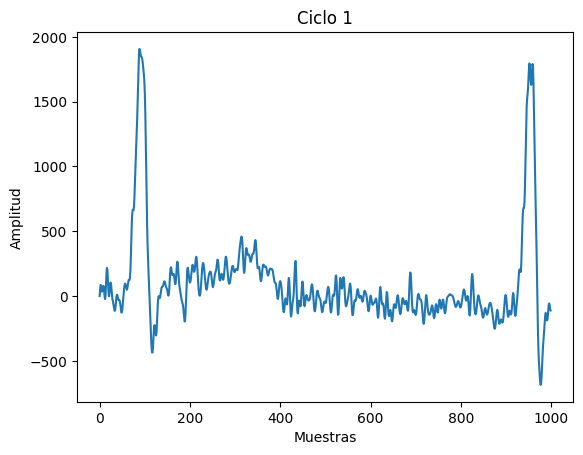

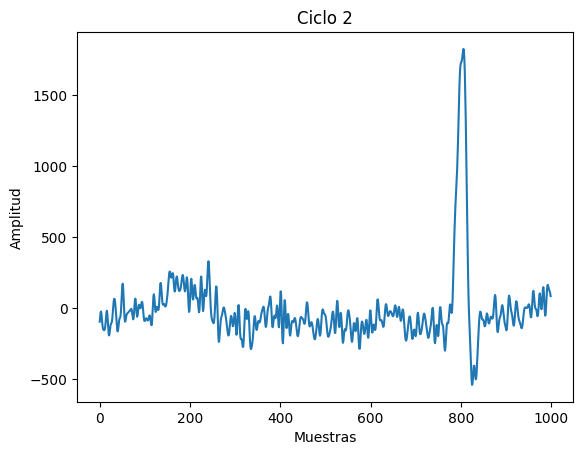

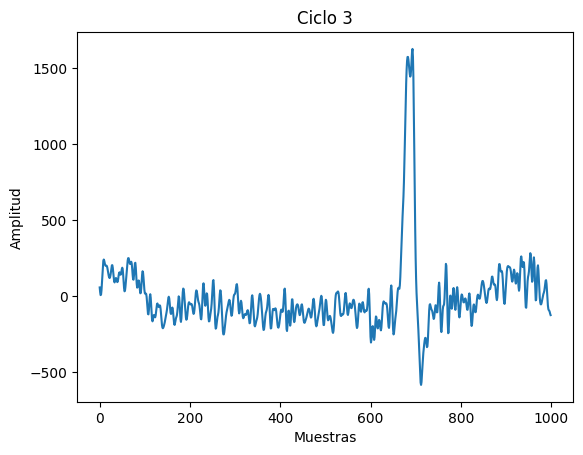

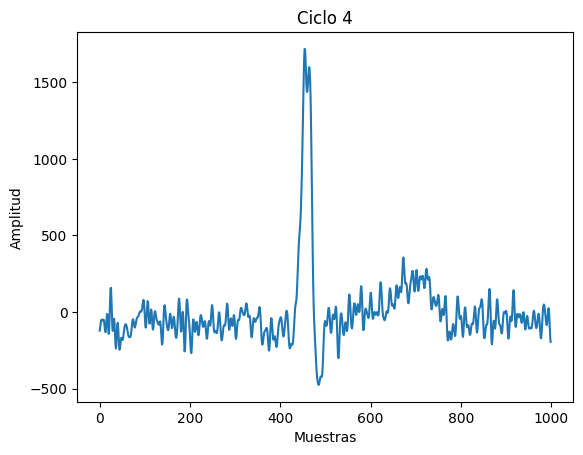

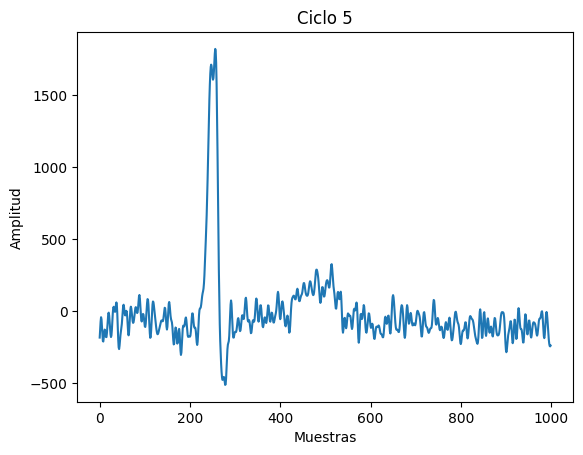

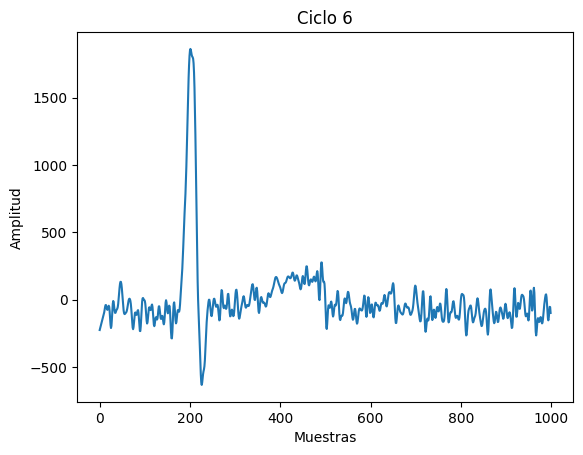

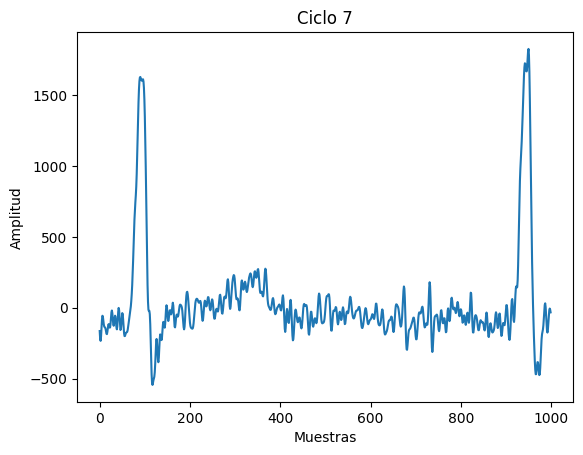

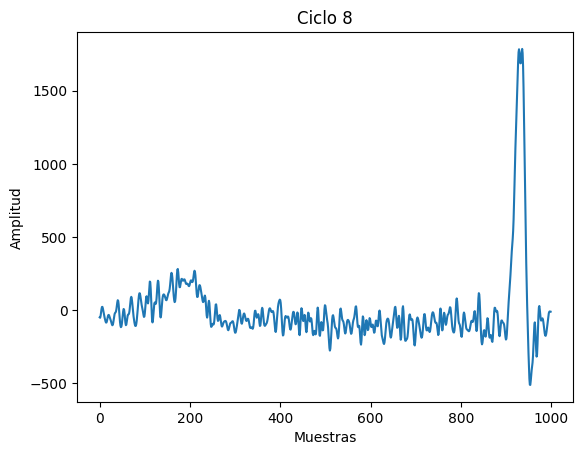

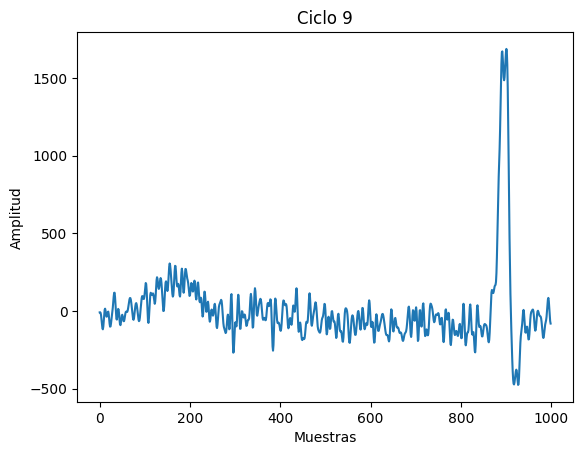

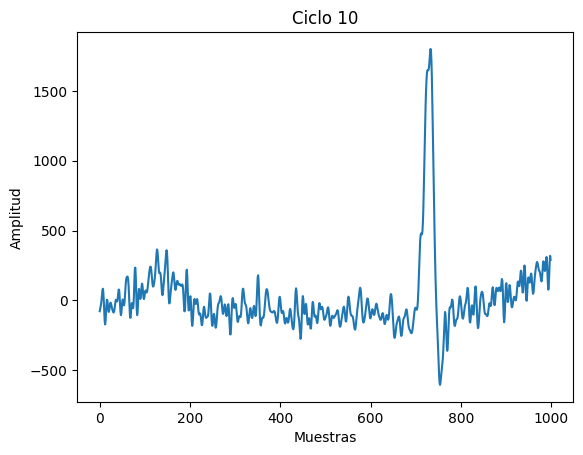

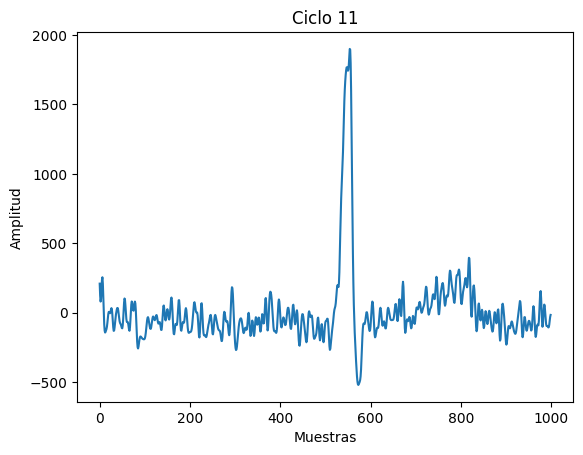

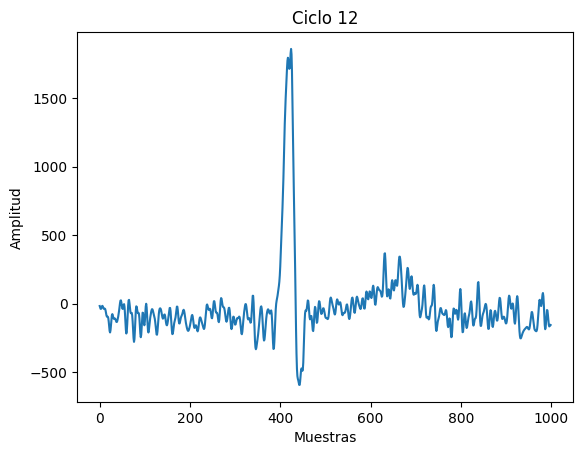

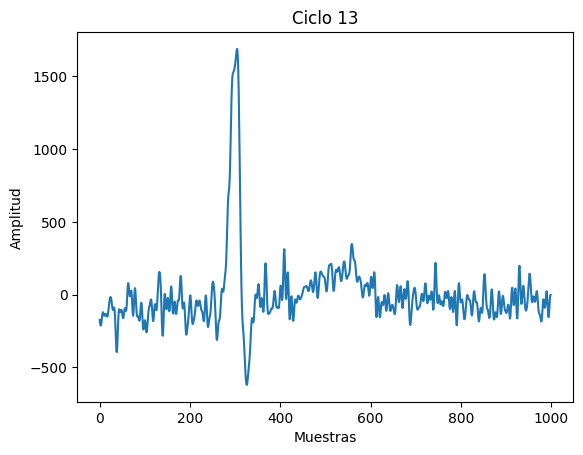

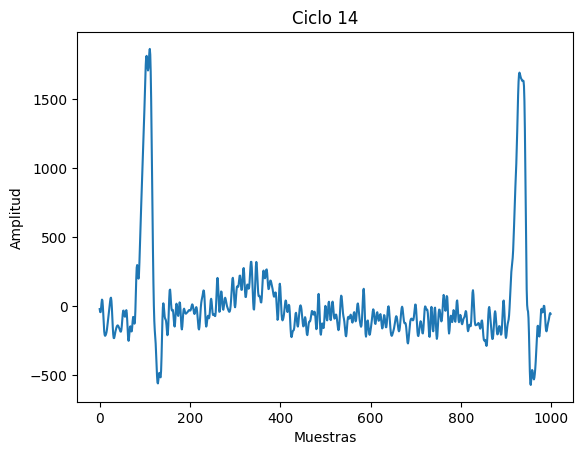

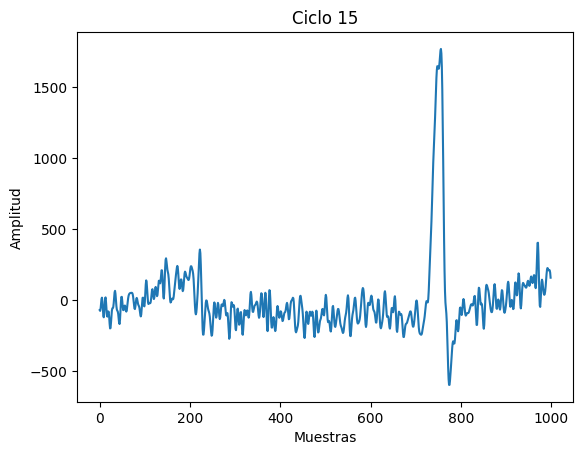

In [22]:
def extraer(señal, num_ciclos):
    ciclos = []
    promedios = []
    varianzas = []

    longitud_ciclo = 1000


    for i in range(num_ciclos):
        inicio = i * longitud_ciclo
        fin = inicio + longitud_ciclo

        ciclo = señal[inicio:fin]
        ciclos.append(ciclo)

        promedio_ciclo = np.mean(ciclo)
        print(f'Promedio ciclo {i+1}:', promedio_ciclo)
        varianza_ciclo = np.var(ciclo)

        promedios.append(promedio_ciclo)
        varianzas.append(varianza_ciclo)

    return ciclos, promedios, varianzas

ciclos, promedios, varianzas = extraer(ECG_filtered, 15)
promedio_global = np.mean(promedios)
varianza_global = np.mean(varianzas)

print("Promedio global:", promedio_global)
print("Varianza global:", varianza_global)

for i, ciclo in enumerate(ciclos):

    plt.plot(ciclo)
    plt.title(f"Ciclo {i+1}")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.show()

Tanto gráfica como estadisticamente vemos diferencias notables entre los ciclos (aunque estos son tomados en intervalos iguales), podemos apreciar las diferencias de picos y también de promedios (lo cual se ve representado en una alta varianza). Podríamos suponer que la señal no presenta estacionariedad, sin embargo existen métodos de mayor comnplejidad para realizar esta prueba.

•
Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t
Análisis estadístico de señales Bioseñales y sistemas
para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la
estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).

In [24]:
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

In [26]:
ciclo1=ciclos[0]
ciclo2=ciclos[13]

_,p1 = shapiro(ciclo1)
_,p2 = shapiro(ciclo2)
print('Normalidad ciclo 1:',p1)
print('Normalidad ciclo 2:',p2)


_, p_levene = levene(ciclo1, ciclo2)
print('Prueba Levene:',p_levene)

Normalidad ciclo 1: 4.0830803216122737e-41
Normalidad ciclo 2: 1.620201899044527e-43
Prueba Levene: 0.08870871723513278


Al ser los ambos valores de normalidad (p1 y p2) menores que 0.05, se debe usar una prueba U de Mann-Whitney

la comparación es una prueba U de Mann-Whitney:
Estadístico U: 641128.0
Valor p: 8.380589509536815e-28
Existe una diferencia significativa entre los ciclos.


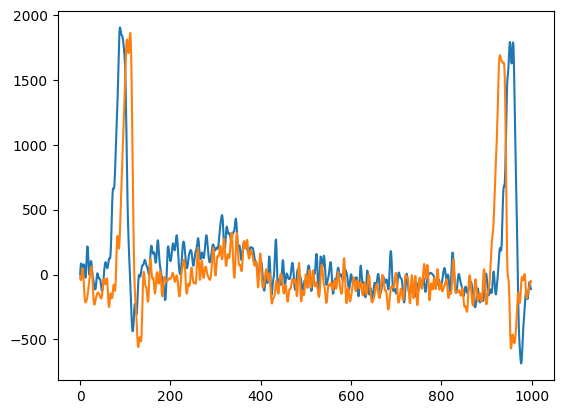

In [28]:
resultado_m, valor_p_m = mannwhitneyu(ciclo1, ciclo2)
print("la comparación es una prueba U de Mann-Whitney:")
print("Estadístico U:", resultado_m)
print("Valor p:", valor_p_m)

if valor_p_m < 0.05:
    print("Existe una diferencia significativa entre los ciclos.")
else:
    print("No hay una diferencia significativa entre los ciclos.")

plt.plot(ciclo1)
plt.plot(ciclo2)

In [29]:
ciclo3=ciclos[4]
ciclo4=ciclos[5]

_,p1 = shapiro(ciclo3)
_,p2 = shapiro(ciclo4)
print('Normalidad ciclo 3:',p1)
print('Normalidad ciclo 4:',p2)


_, p_levene = levene(ciclo3, ciclo4)
print('Prueba Levene:',p_levene)

Normalidad ciclo 3: 2.855655735798511e-45
Normalidad ciclo 4: 1.5818990106472823e-45
Prueba Levene: 0.8615199935645131


la comparación es una prueba U de Mann-Whitney:
Estadístico U: 465836.0
Valor p: 0.008153846595778386
Existe una diferencia significativa entre los ciclos.


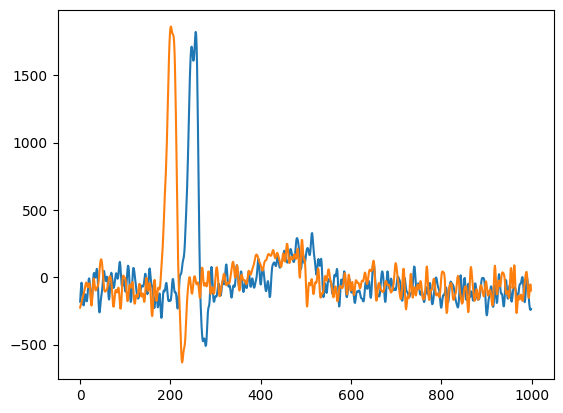

In [30]:
resultado_m, valor_p_m = mannwhitneyu(ciclo3, ciclo4)
print("la comparación es una prueba U de Mann-Whitney:")
print("Estadístico U:", resultado_m)
print("Valor p:", valor_p_m)

if valor_p_m < 0.05:
    print("Existe una diferencia significativa entre los ciclos.")
else:
    print("No hay una diferencia significativa entre los ciclos.")

plt.plot(ciclo3)
plt.plot(ciclo4)

En el caso de ambos ciclos la prueba de normalidad arroja un resultado menor al nivel de significancia (tomado para este caso como 0.05), lo que indica que se rechaza la hipotesis nula en este caso, es decir que sugiere que los datos no contienen una distribución normal.

Para la prueba de varianza (Levene) obtenemos resultados arrojan valores mayores que 0.05, entonces en nuestro caso no se rechaza la hipotesis nula la cual sugiere que no tienen varianza iguales.

La prueba Mann-Whitney se utiliza para comparar muestras independientes(la independencia se especifica en el ejercicio  propuesto) y determina si una muestra tiene valores significativamente diferentes, para realizar este analisis se calcula el valor de p por medio de la función mannwhitneyu, y se compara con el nivel de significancia (0.05), si el valor p es menor entonces se rechaza la hipotesis nula (no hay diferencia significativa), y se sugiere que si hay una diferencia significativa, en el caso de estos dos ciclos (ciclo1 y ciclo2), el p es menor que la significancia por lo tanto se rechaza la hipotesis nula y se toma si existe una diferencia significativa

•
Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad)

In [31]:
from statsmodels.tsa.stattools import adfuller

In [33]:
result = adfuller(ECG_filtered)

print('Estadística de la prueba de Dickey-Fuller:', result[0])
print('Valor p:', valor_p_m)
print('Valores críticos:')
print('1%:', result[4]['1%'])
print('5%:', result[4]['5%'])
print('10%:', result[4]['10%'])

Estadística de la prueba de Dickey-Fuller: -0.6546593807809804
Valor p: 0.008153846595778386
Valores críticos:
1%: -3.430563031267381
5%: -2.8616341541406003
10%: -2.5668201153621077


- El valor del estadístico de la prueba es mayor que los valores críticos en todos los niveles de significancia (1%, 5% y 10%). Por lo tanto, no podemos rechazar la hipótesis nula de que la serie temporal tiene una raíz unitaria, lo que sugiere que la serie temporal es no estacionaria.
- El valor p es significativamente mayor que el nivel de significancia comúnmente utilizado de 0.05, lo que respalda la conclusión de que no podemos rechazar la hipótesis nula. Esto también sugiere que la serie temporal es no estacionaria.

Finalmente y gracias a los datos obtenidos, podemos concluir que la serie temporal analizada es no estacionaria.